In [1]:
# import PyPDF2
# import spacy
import numpy as np
import pandas as pd
import fitz
import nltk

from nltk.tokenize import sent_tokenize

# nlp = spacy.load('en_core_web_lg')

# from pathlib import Path

import os
import re

In [2]:
# sent_list = []

# for page in pdf_text[2:]:
#     doc = nlp(page)
#     for sentence in doc.sents:
#         sent_list.append(sentence)

In [2]:
path_articles = 'C:\\Users\\tnguyen10\\OneDrive - Deloitte (O365D)\\Documents\\GitHub\\Thesis\\data\\articles'
fname_out = 'C:\\Users\\tnguyen10\\OneDrive - Deloitte (O365D)\\Documents\\GitHub\\Thesis\\data_structured\\article_sentences_pdf.csv'

In [4]:
os.listdir(path_articles)

['beiersdorf.PDF',
 'colgate.PDF',
 'diageo.PDF',
 'ford-motor.PDF',
 'general-mills.PDF',
 'henkel.PDF',
 'hershey.PDF',
 'inditex.PDF',
 'komatsu.PDF',
 'linde.PDF',
 'mondelez.PDF',
 'ralph-lauren.PDF',
 'sonoco.PDF']

In [3]:
def get_cnt(text):
    cnt = 0
    for word in text.split():
        if word.isalnum():
            cnt += 1
    return cnt

In [4]:
def get_text(block_lst):

    
    text_lst = []
    for block in block_lst:
        if block[6] != 0: continue # block_type: 0 = text
    
        text = ''.join([i if ord(i) < 128 else ' ' for i in block[4]]) #removes non-ascii characters already 
    
        #if get_cnt(text) > 5: 
        text_lst.append(text)
        
    return (text_lst)

In [7]:
# test_sent = sent_tokenize(text)[2]

# r_sent = ' '.join(test_sent.split()) #split splits the words of the sentence into a list - and gets rid of /n etc.

# ' '.join(test_sent.split()) #joins the items of the list with a space 

In [8]:
# def get_sentence(fname, skip_page = (0,)):
 
#     doc = fitz.open(fname)
    
#     sent_lst = []
#     for page_no, page in enumerate(doc):

#         # Skip page
#         if page_no+1 in skip_page: continue
        
#         block_lst = page.get_text_blocks()
#         text = get_text(block_lst)
        
# #         for i,sentence in enumerate(text):
# #             if sentence == "Body\n":
# #                 beg = i+1
# #             if sentence == "Classification\n":
# #                 end = i
# #                 lst += tester[beg:end]
    
#         for i, sentence in enumerate(sent_tokenize(text)):
#             r_sent = ' '.join(sentence.split()) # Delete '\n', '\t' and strip
#             sent_lst.append(r_sent)
            
#     doc.close()

#     return sent_lst

In [5]:
def get_sentence(fname):
 
    doc = fitz.open(fname)
    
    text_lst = []
    for page_no, page in enumerate(doc):
        block_lst = page.get_text_blocks()
        text = get_text(block_lst)
        text_lst += text
    
    lst = []
    for i,text in enumerate(text_lst):
        if text == "Body\n":
            beg = i+1
        if text == "End of Document\n":
            end = i
            chunk = text_lst[beg:end]
            chunk[:] = (text for text in chunk if get_cnt(text) > 5)
        # for block in chunk:
        #     if get_cnt(block) < 5:
        #         chunk.remove(block)
        #     #block.replace('-\n', '')
            to_tokenize ='\n'.join(chunk)
            sent_lst = []
            for token in sent_tokenize(to_tokenize):
                sentences = token.split('\n\n')
                for sentence in sentences:
                    r_sent = ' '.join(sentence.split())
                    sent_lst.append(r_sent)
            lst += sent_lst
        
# for block in lst:
#     if get_cnt(block) < 5:
#         lst.remove(block)
#     #block.replace('-\n', '')
# to_tokenize ='\n'.join(lst)
    
# sent_lst = []
# for i, sentence in enumerate(sent_tokenize(to_tokenize)):
#     r_sent = ' '.join(sentence.split())
#     sent_lst.append(r_sent)
            
    doc.close()
    return lst

In [10]:
# doc = fitz.open('coca_cola_nexis.pdf')
    
# text_lst = []
# for page_no, page in enumerate(doc):
#     block_lst = page.get_text_blocks()
#     text = get_text(block_lst)
#     text_lst += text
    
# lst = []
# for i,text in enumerate(text_lst):
#     if text == "Body\n":
#         beg = i+1
#     if text == "Classification\n":
#         end = i
#         lst += text_lst[beg:end]
        
# lst[:] = (block for block in lst if get_cnt(block) > 5)
#     #block.replace('-\n', '')
# to_tokenize ='\n'.join(lst)
    
# sent_lst = []
# for i, sentence in enumerate(sent_tokenize(to_tokenize)):
#     r_sent = ' '.join(sentence.split())
#     sent_lst.append(r_sent)
            
# doc.close()
# sent_lst

In [11]:
# doc = fitz.open('coca_cola_nexis.pdf')
    
# text_lst = []
# for page_no, page in enumerate(doc):
#     block_lst = page.get_text_blocks()
#     text = get_text(block_lst)
#     text_lst += text
    
# lst = []
# for i,text in enumerate(text_lst):
#     if text == "Body\n":
#         beg = i+1
#     if text == "Classification\n":
#         end = i
#         chunk = text_lst[beg:end]
#         chunk[:] = (text for text in chunk if get_cnt(text) > 5)
#         # for block in chunk:
#         #     if get_cnt(block) < 5:
#         #         chunk.remove(block)
#         #     #block.replace('-\n', '')
#         to_tokenize ='\n'.join(chunk)
#         sent_lst = []
#         for i, sentence in enumerate(sent_tokenize(to_tokenize)):
#             r_sent = ' '.join(sentence.split())
#             sent_lst.append(r_sent)
#         lst += sent_lst
        
# # for block in lst:
# #     if get_cnt(block) < 5:
# #         lst.remove(block)
# #     #block.replace('-\n', '')
# # to_tokenize ='\n'.join(lst)
    
# # sent_lst = []
# # for i, sentence in enumerate(sent_tokenize(to_tokenize)):
# #     r_sent = ' '.join(sentence.split())
# #     sent_lst.append(r_sent)
            
# doc.close()


In [6]:
def gen_document(fname, sent_lst):

    res_df = pd.DataFrame(
        {
            'doc_type': "news",
            'company': fname.split(".")[0],
            'sentence': sent_lst
        }
    )
    
    return res_df

In [7]:
def read_filelist(path):

    # Create empty DataFrame
    df = pd.DataFrame()
    
    # Read file list (directory)
    for idx, fname in enumerate(os.listdir(path)):
        p_fname = os.path.join(path, fname)
        print('path + fname >>>', p_fname)
        
        if p_fname.split('.')[-1] != 'PDF': continue
        print('fname >>>',fname)
    
#         doc_id = int(idx)
        
#         print(f'doc_id = [{doc_id}], fname = [{fname}]')
#         print('')
    
        sent_lst = get_sentence(p_fname)
        df_doc   = gen_document(fname, sent_lst)
        
        df = pd.concat([df,df_doc])
        
    return df

In [32]:
%%time
df = read_filelist(path_articles)
print('==== End of jobs ====')

path + fname >>> C:\Users\tnguyen10\OneDrive - Deloitte (O365D)\Documents\GitHub\Thesis\data\articles\beiersdorf.PDF
fname >>> beiersdorf.PDF
path + fname >>> C:\Users\tnguyen10\OneDrive - Deloitte (O365D)\Documents\GitHub\Thesis\data\articles\colgate.PDF
fname >>> colgate.PDF
path + fname >>> C:\Users\tnguyen10\OneDrive - Deloitte (O365D)\Documents\GitHub\Thesis\data\articles\diageo.PDF
fname >>> diageo.PDF
path + fname >>> C:\Users\tnguyen10\OneDrive - Deloitte (O365D)\Documents\GitHub\Thesis\data\articles\ford-motor.PDF
fname >>> ford-motor.PDF
path + fname >>> C:\Users\tnguyen10\OneDrive - Deloitte (O365D)\Documents\GitHub\Thesis\data\articles\general-mills.PDF
fname >>> general-mills.PDF
path + fname >>> C:\Users\tnguyen10\OneDrive - Deloitte (O365D)\Documents\GitHub\Thesis\data\articles\henkel.PDF
fname >>> henkel.PDF
path + fname >>> C:\Users\tnguyen10\OneDrive - Deloitte (O365D)\Documents\GitHub\Thesis\data\articles\hershey.PDF
fname >>> hershey.PDF
path + fname >>> C:\Users\tn

In [33]:
df

,doc_type,company,sentence
0,news,beiersdorf,"This offers businesses in food and beverage, p..."
1,news,beiersdorf,"Designed with sustainability in mind, the tesa..."
2,news,beiersdorf,"To reduce the consumption of virgin plastic, u..."
3,news,beiersdorf,70 percent of the polyethylene (PET) that make...
4,news,beiersdorf,The tape supports the circular economy and can...
...,...,...,...
312,news,sonoco,"Newstex Authoritative Content is not ""read and..."
313,news,sonoco,"Accordingly, neither Newstex nor its re-distri..."
314,news,sonoco,The Newstex Authoritative Content shall be con...
315,news,sonoco,"Accordingly, no warranties or other guarantees..."


In [34]:
df.shape

(3955, 3)

# Further Cleaning

In [10]:
import re

In [35]:
df_article = df.copy()

In [36]:
character_to_remove = r'[^!"#$%&\'()*+,-./:;<=>?@\[\]^_\`{|}~\\\\0-9a-zA-Z]'
df_article["sentence"] = df_article["sentence"].str.replace('"','', regex = True)

In [32]:
# testsentence =  'Feb 09, 2021( Digital Journal: http://www.digitaljournal.com Delivered by Newstex) The soda and beverage giant has often been criticized for being one of the biggest producers of plastic waste.'
# s1 = re.sub('http\S+','',testsentence)
# print(s1)

In [33]:
# t = df.iloc[83]['sentence']
# s1 = re.sub('http\S+|\[.\d+\]:|www\S+|\w+/\S+|\w+-\w+-\S+','',t)
# s2 = re.sub('^\s+|\s+$','',s1)
# s3 = re.sub('\s{2,}',' ',s2)
# print(s3)

In [37]:
df_article["sentence"] = df_article["sentence"].replace(r'http\S+|\[.\]:?|www\S+|\w+/\S+|\w+-\w+-\S+|\[|\]','',regex = True).replace(r'^\s+|\s+$','',regex=True).replace(r'\s{2,}',' ',regex=True)

In [38]:
df_article['sentence'] = df_article['sentence'].str.replace('Nestl ', 'Nestle ')
df_article['sentence'] = df_article['sentence'].str.replace('Mondel z', 'Mondelez')

In [42]:
df_article = df_article[df_article['sentence'].astype(bool)]

In [44]:
df_article.reset_index(inplace = True, drop = True)

In [ ]:
# my pdf package does not know how to deal with sentences that span across pages - define a funciton here, which will merge the two sentences following each other
# if the previous one doesn't end with punctuation and the following starts with a lower case letter
import string

# define a function to check if a sentence ends with punctuation
def ends_with_punctuation(s):
    return s.strip()[-1] in string.punctuation

# loop over each row in the DataFrame and concatenate the sentences as needed
for i, row in df_article.iterrows():
    # skip the first row as there is no previous row to compare with
    if i == 0:
        continue
    
    # get the current and previous sentences
    prev_sentence = df_article.loc[i-1, 'sentence']
    curr_sentence = df_article.loc[i, 'sentence']
    
    # check if the previous sentence ends with punctuation and the current sentence starts with a lowercase letter
    if not ends_with_punctuation(prev_sentence) and curr_sentence[0].islower():
        # concatenate the sentences with a space
        df_article.at[i, 'sentence'] = prev_sentence + ' ' + curr_sentence
        # drop the previous row
        df_article.drop(i-1, inplace=True)

In [46]:
df_article["word count"] = [len(i) for i in df_article["sentence"].str.split()]

C:\Users\tnguyen10\AppData\Local\Temp\ipykernel_10600\362996005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_article["word count"] = [len(i) for i in df_article["sentence"].str.split()]


In [47]:
df_article = df_article[df_article["word count"] > 5]

In [48]:
df_article = df_article[df_article["word count"] < 100]

In [50]:
# define a function to check if a sentence is comprised of more than half uppercase characters
def is_mostly_uppercase(sentence):
    return sum(1 for c in sentence if c.isupper()) / len(sentence) > 0.5

# apply the function to the 'sentence' column and filter out the rows where the condition is True
df_article = df_article[~df_article['sentence'].apply(is_mostly_uppercase)]

# print the resulting dataframe
df_article

,doc_type,company,sentence,word count
0,news,beiersdorf,"This offers businesses in food and beverage, p...",15
1,news,beiersdorf,"Designed with sustainability in mind, the tesa...",23
2,news,beiersdorf,"To reduce the consumption of virgin plastic, u...",24
3,news,beiersdorf,70 percent of the polyethylene (PET) that make...,16
4,news,beiersdorf,The tape supports the circular economy and can...,19
...,...,...,...,...
3941,news,sonoco,Newstex Authoritative Content is not read and ...,12
3942,news,sonoco,"Accordingly, neither Newstex nor its re-distri...",40
3943,news,sonoco,The Newstex Authoritative Content shall be con...,12
3944,news,sonoco,"Accordingly, no warranties or other guarantees...",25


In [51]:
df_article.reset_index(inplace = True, drop = True)

array([[<Axes: title={'center': 'word count'}>]], dtype=object)

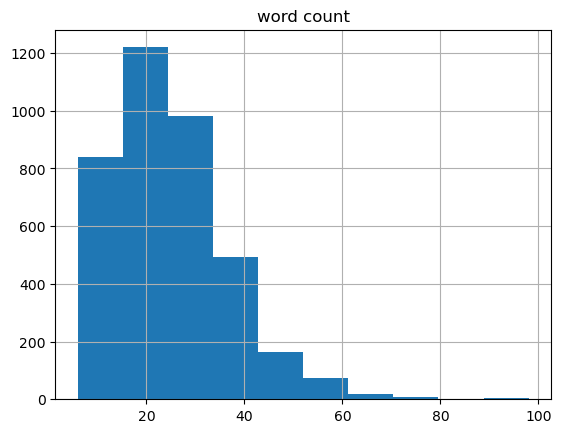

In [52]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
df_article.hist(column = 'word count')

In [53]:
df_article.drop_duplicates(subset = ['sentence'], inplace = True)

In [55]:
df_article.to_csv(fname_out, index = False)

In [54]:
df_article

,doc_type,company,sentence,word count
0,news,beiersdorf,"This offers businesses in food and beverage, p...",15
1,news,beiersdorf,"Designed with sustainability in mind, the tesa...",23
2,news,beiersdorf,"To reduce the consumption of virgin plastic, u...",24
3,news,beiersdorf,70 percent of the polyethylene (PET) that make...,16
4,news,beiersdorf,The tape supports the circular economy and can...,19
...,...,...,...,...
3794,news,sonoco,EPA is stated to have determined at the time o...,30
3795,news,sonoco,This is stated to be because spent solvents we...,33
3796,news,sonoco,Hazardous Waste Enforcement: U.S. Environmenta...,18
3797,news,sonoco,"A civil penalty of $52,000 is assessed.",7


# Loading in CLIMATEbert

In [6]:
import torch
print(torch.__version__)

1.13.1


In [16]:
from transformers import pipeline, AutoTokenizer, AutoModel, AutoModelForMaskedLM, AutoModelForSequenceClassification
from scipy.spatial.distance import cosine
from sklearn.preprocessing import normalize

model_name = 'climatebert/distilroberta-base-climate-f'

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModel.from_pretrained(model_name)

Some weights of the model checkpoint at climatebert/distilroberta-base-climate-f were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for pre

In [9]:
z = ["This product is environmentally friendly.",
    'The offering happens to be good for nature.',
    'The product is unsustainable and destroys the environment.']

def transformer_embedding (name, inp): 
    model = AutoModel.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    pipe = pipeline('feature-extraction', model=model, tokenizer = tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features

embedding_features1=transformer_embedding(model_name,z[0])
embedding_features2=transformer_embedding(model_name,z[2])
distance=1-cosine(embedding_features1[0],embedding_features2[0])
print(distance)

Some weights of the model checkpoint at climatebert/distilroberta-base-climate-f were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for pre

0.998254427493864


In [22]:
sentences1 = df_article['sentence'].tolist()

In [27]:
inputs = tokenizer(sentences1, return_tensors='pt', padding=True, truncation=False)

In [28]:
outputs = model(**inputs)

In [29]:
embeddings = outputs.last_hidden_state.mean(dim=1)

AttributeError: 'MaskedLMOutput' object has no attribute 'last_hidden_state'

In [105]:
# Define the sentences to embed
sentences = ["This product is environmentally friendly.", 
             "Jello is amazing food.", 
             "Hello darkness, my old friend."]

sentences2 = ['Hello darkness, my old friend.',
              'The company is greenwashing.',
              'The company has increased its emissions by a large amount.']

# Tokenize the sentences
tokenized = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

# Generate the embeddings
with torch.no_grad():
    outputs = model(**tokenized)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    
# Tokenize the sentences
tokenized2 = tokenizer(sentences2, padding=True, truncation=True, return_tensors="pt")

# Generate the embeddings
with torch.no_grad():
    outputs2 = model(**tokenized2)
    embeddings2 = outputs2.last_hidden_state.mean(dim=1)

# Calculate the cosine similarity between all pairs of embeddings
#cos_sim = torch.nn.functional.cosine_similarity(embeddings[0], embeddings2[0])

# Convert the similarity matrix to a pandas dataframe
#similarity_df = pd.DataFrame(similarity_matrix.numpy(), columns=sentences, index=sentences2)

# Print the similarity matrix
embeddings = embeddings.detach().numpy()
embeddings2 = embeddings2.detach().numpy()

cosine_similarity([embeddings[0]],
                  embeddings2[0:]
                 )

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


array([[0.19340062, 0.5186796 , 0.40626413]], dtype=float32)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

In [106]:
tokens = {'input_ids': [], 'attention_mask': []}

In [107]:
for sentence in sentences:
    new_tokens = tokenizer.encode_plus(sentence, max_length = 512,
                          truncation = True, padding = 'max_length',
                          return_tensors = 'pt')
    tokens['input_ids'].append(new_tokens['input_ids'][0]) #list within a list - we want to extrac the list with the 0
    tokens['attention_mask'].append(new_tokens['attention_mask'][0])

In [108]:
tokens['input_ids'] = torch.stack(tokens['input_ids'])
tokens['attention_mask'] = torch.stack(tokens['attention_mask'])

In [93]:
tokens['input_ids'].shape

torch.Size([3, 512])

In [109]:
outputs = model(**tokens)

In [95]:
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [110]:
embeddings = outputs.last_hidden_state
embeddings.shape

torch.Size([3, 512, 768])

In [111]:
attention = tokens['attention_mask']
attention.shape

torch.Size([3, 512])

In [112]:
mask = attention.unsqueeze(-1).expand(embeddings.shape).float()

In [113]:
mask_embeddings = embeddings*mask

In [114]:
summed = torch.sum(mask_embeddings, 1)
summed.shape

torch.Size([3, 768])

In [115]:
counts = torch.clamp(mask.sum(1), min = 1e-9)
counts.shape

torch.Size([3, 768])

In [116]:
mean_pooled = summed/counts
mean_pooled.shape

torch.Size([3, 768])

In [117]:
mean_pool = mean_pooled.detach().numpy()

cosine_similarity([mean_pool[0]],
                  mean_pool[1:]
                 )

array([[0.4212029 , 0.19536817]], dtype=float32)

In [20]:
# Load ClimateBERT tokenizer and model
model_name = "climatebert/distilroberta-base-climate-f"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Define input sentences
sentences = [
    "This product is environmentally friendly.",
    'The offering happens to be good for nature.',
    'The product is unsustainable and destroys the environment.']
# Tokenize and encode the sentences
encoded_sentences = [tokenizer.encode(s, add_special_tokens=True) for s in sentences]
max_len = max(len(s) for s in encoded_sentences)
padded_sentences = [s + [tokenizer.pad_token_id] * (max_len - len(s)) for s in encoded_sentences]
inputs = torch.tensor(padded_sentences)

# Obtain sentence embeddings
with torch.no_grad():
    outputs = model(inputs)
    embeddings = outputs.last_hidden_state[:, 0, :]
    
# Normalize the embeddings
norm_embeddings = normalize(embeddings.numpy())

# Compute cosine similarity between sentence embeddings
similarity_matrix = 1 - cosine_similarity(norm_embeddings)

# Extract the upper triangular part of the matrix
similarity_scores = similarity_matrix[np.triu_indices(len(sentences), k=1)]

# Print the similarity scores
for i, score in enumerate(similarity_scores):
    print(f"Similarity score between sentences {i+1} and {i+2}: {score:.4f}")


Some weights of the model checkpoint at climatebert/distilroberta-base-climate-f were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for pre

Similarity score between sentences 1 and 2: 0.0029
Similarity score between sentences 2 and 3: 0.0023
Similarity score between sentences 3 and 4: 0.0029


In [109]:
feature_extraction = pipeline('feature-extraction', model="distilroberta-base", tokenizer="distilroberta-base")
features = feature_extraction(["This product is environmentally friendly.",
                               'The offering happens to be good for nature.',
                               'The product is unsustainable and destroys the environment.'])

C:\Users\tnguyen10\Anaconda3\envs\thesis\lib\site-packages\huggingface_hub-0.13.1-py3.8.egg\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\tnguyen10\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development


Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [110]:
sent1=np.array(features[0][0][0])
sent2=np.array(features[1][0][0])
sent3=np.array(features[2][0][0])

In [111]:
sent1=sent1.reshape(1,-1)
sent2=sent2.reshape(1,-1)
sent3 = sent3.reshape(1,-1)

In [115]:
cosine_similarity(sent2,sent3)

array([[0.99916961]])